## Hierarchical Clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df = df.rename_axis(None)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [4]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

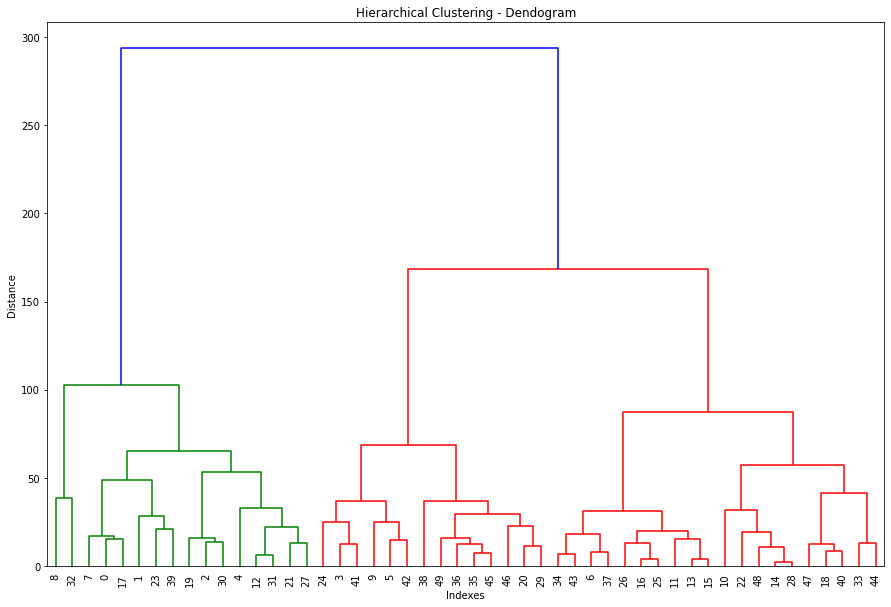

In [5]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

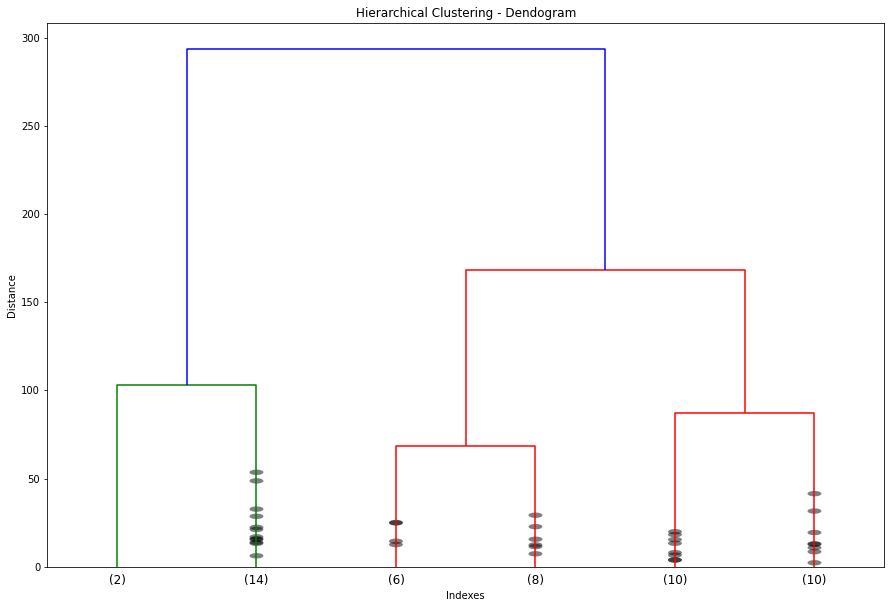

In [6]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 6,
    show_contracted = True
);

## Determining Optimum Cluster Number

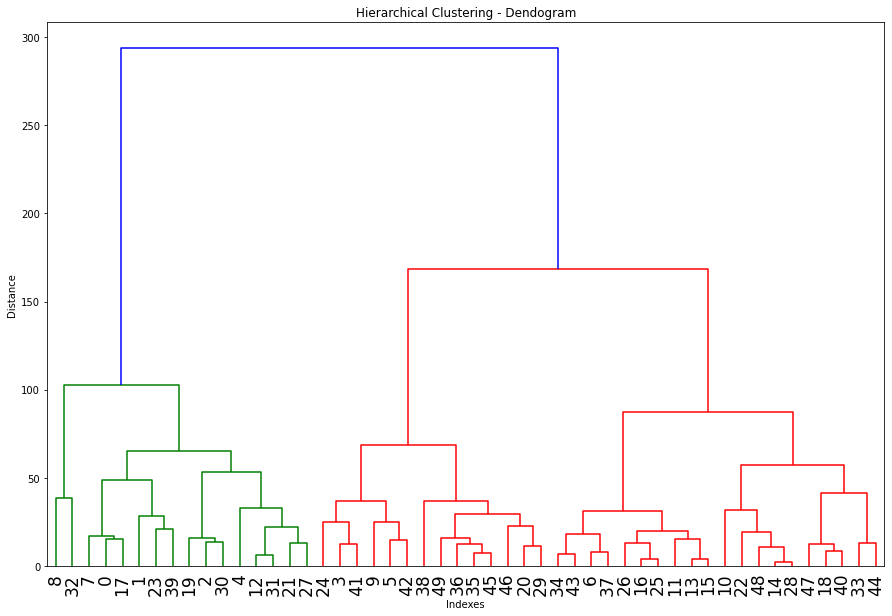

In [7]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=17
);

In [8]:
?den

Object `den` not found.


In [9]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='b',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children.  The top of the U-link indicates a
cluster merge.  The two legs of the U-link indicate which clusters
were merged.  The length of the two legs of the U-link represents
the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix enc

In [10]:
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [11]:
pd.DataFrame({"States" : df.index, "Clusters": cluster.fit_predict(df)})[0:10]


,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [12]:
df["Cluster_Num"] = cluster.fit_predict(df)

In [13]:
df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_Num
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
